### Objective:  In this notebook, I am doing a grid search using logistic regression. 
I will do the grid search using 10 fold CV on a subset of the training data. 

### Load modules and the data

In [101]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_auc_score, roc_curve, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score, roc_curve, confusion_matrix, make_scorer

import numpy as np
import pandas as pd
import seaborn as sns
from os.path import join, split
from os import listdir
import matplotlib.pyplot as plt
%matplotlib inline

pd.set_option('display.max_rows',999)
pd.set_option('display.max_columns', 999)
%matplotlib inline


In [2]:
base = join('/Users/crivera5/Documents/NonIntuitProjects/Kaggle/KaggleEEG','data_local')
data= pd.read_csv(join(base,'cleaned_training.csv'))

X = data.iloc[:, :-3].copy()
y = data.iloc[:,-1].copy()

### Split the data into test and train


In [3]:
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=4)

### Set up the pipeline and fit the data

The pipeline below: 

1. scales the data
2. trains a logistic regressor with GridSearchCV. 

I am trying 3 different parameters in my grid search: 

1. C: the tunning parameter. 
2. Class_weight: Toggling whether the regressor uses balanced or not balanced wieghting strategy to account for imbalances in the classes. 
3. penalty: 'L1' or 'L2'

In [9]:
# the space to search 
number_c= 40
start = -2
end = 2

scalar = StandardScaler()

clf = LogisticRegression(C = 1.0,
                          class_weight = None,
                          penalty = 'l1',
                          random_state = 444,
                          solver = 'liblinear')

pipeline = Pipeline([('scalar',StandardScaler()),
                     ('clf', clf)])
parameters = {'clf__C':np.logspace(start,end,number_c), 'clf__class_weight':[None, 'balanced'],'clf__penalty':['l1','l2']}
model = GridSearchCV(pipeline, parameters, n_jobs = -1, scoring = 'roc_auc',verbose = True, cv = 10)
model.fit(X_train,y_train)

Fitting 10 folds for each of 160 candidates, totalling 1600 fits


[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    4.0s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:   21.4s
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 784 tasks      | elapsed:  4.3min
[Parallel(n_jobs=-1)]: Done 1234 tasks      | elapsed: 27.8min
[Parallel(n_jobs=-1)]: Done 1600 out of 1600 | elapsed: 60.0min finished


GridSearchCV(cv=10, error_score='raise',
       estimator=Pipeline(steps=[('scalar', StandardScaler(copy=True, with_mean=True, with_std=True)), ('clf', LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l1', random_state=444, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False))]),
       fit_params={}, iid=True, n_jobs=-1,
       param_grid={'clf__penalty': ['l1', 'l2'], 'clf__C': array([  1.00000e-02,   1.26638e-02,   1.60372e-02,   2.03092e-02,
         2.57191e-02,   3.25702e-02,   4.12463e-02,   5.22335e-02,
         6.61474e-02,   8.37678e-02,   1.06082e-01,   1.34340e-01,
         1.70125e-01,   2.15443e-01,   2.72833e...4.92388e+01,   6.23551e+01,   7.89652e+01,   1.00000e+02]), 'clf__class_weight': [None, 'balanced']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='roc_auc', verbose=True)

In [33]:
# save the model
from sklearn.externals import joblib
filename = join(base,'LogisticRegressionModel.joblib.pkl')
joblib.dump(clf, filename, compress=3)

['/Users/crivera5/Documents/NonIntuitProjects/Kaggle/KaggleEEG/data_local/LogisticRegressionModel.joblib.pkl']

### Get the best estimator of the bunch

Below I am getting the best model of the bunch. 

In [34]:
model.cv_results_.keys()

['rank_test_score',
 'split6_test_score',
 'split7_train_score',
 'split0_train_score',
 'split2_test_score',
 'mean_fit_time',
 'split3_train_score',
 'split6_train_score',
 'split9_test_score',
 'std_test_score',
 'params',
 'split8_test_score',
 'std_score_time',
 'std_fit_time',
 'std_train_score',
 'split4_test_score',
 'split1_train_score',
 'split2_train_score',
 'param_clf__penalty',
 'split4_train_score',
 'mean_score_time',
 'split9_train_score',
 'split5_test_score',
 'mean_train_score',
 'param_clf__C',
 'split8_train_score',
 'split7_test_score',
 'split0_test_score',
 'mean_test_score',
 'split3_test_score',
 'param_clf__class_weight',
 'split5_train_score',
 'split1_test_score']

In [10]:
best_model  = model.best_estimator_

In [17]:
best_model.get_params()

{'clf': LogisticRegression(C=0.70170382867038261, class_weight='balanced', dual=False,
           fit_intercept=True, intercept_scaling=1, max_iter=100,
           multi_class='ovr', n_jobs=1, penalty='l1', random_state=444,
           solver='liblinear', tol=0.0001, verbose=0, warm_start=False),
 'clf__C': 0.70170382867038261,
 'clf__class_weight': 'balanced',
 'clf__dual': False,
 'clf__fit_intercept': True,
 'clf__intercept_scaling': 1,
 'clf__max_iter': 100,
 'clf__multi_class': 'ovr',
 'clf__n_jobs': 1,
 'clf__penalty': 'l1',
 'clf__random_state': 444,
 'clf__solver': 'liblinear',
 'clf__tol': 0.0001,
 'clf__verbose': 0,
 'clf__warm_start': False,
 'scalar': StandardScaler(copy=True, with_mean=True, with_std=True),
 'scalar__copy': True,
 'scalar__with_mean': True,
 'scalar__with_std': True,
 'steps': [('scalar',
   StandardScaler(copy=True, with_mean=True, with_std=True)),
  ('clf',
   LogisticRegression(C=0.70170382867038261, class_weight='balanced', dual=False,
             fit

In [16]:
best_model.get_params()

{'clf': LogisticRegression(C=0.70170382867038261, class_weight='balanced', dual=False,
           fit_intercept=True, intercept_scaling=1, max_iter=100,
           multi_class='ovr', n_jobs=1, penalty='l1', random_state=444,
           solver='liblinear', tol=0.0001, verbose=0, warm_start=False),
 'clf__C': 0.70170382867038261,
 'clf__class_weight': 'balanced',
 'clf__dual': False,
 'clf__fit_intercept': True,
 'clf__intercept_scaling': 1,
 'clf__max_iter': 100,
 'clf__multi_class': 'ovr',
 'clf__n_jobs': 1,
 'clf__penalty': 'l1',
 'clf__random_state': 444,
 'clf__solver': 'liblinear',
 'clf__tol': 0.0001,
 'clf__verbose': 0,
 'clf__warm_start': False,
 'scalar': StandardScaler(copy=True, with_mean=True, with_std=True),
 'scalar__copy': True,
 'scalar__with_mean': True,
 'scalar__with_std': True,
 'steps': [('scalar',
   StandardScaler(copy=True, with_mean=True, with_std=True)),
  ('clf',
   LogisticRegression(C=0.70170382867038261, class_weight='balanced', dual=False,
             fit

### Plot an ROC curve

In [35]:
def plot_roc_curves(model_data, lw = 0.8):
    '''plots an roc curve
    Parameters: 
        model_data: dicts obs and probs
        classifier
    Returns: 
        None
    '''
    for model in model_data:
        print model
        obs = model_data[model]['obs']
        probs = model_data[model]['probs']
        fpr, tpr, _= roc_curve(obs, probs)
        
        plt.plot(fpr, tpr,label = model, lw=lw)
    plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic curves')
    plt.legend(loc = 0)
    
    return None

In [44]:
probs = [pred[1] for pred in best_model.predict_proba(X_test)]
model_data = {'Best L1 Logistic Regression': {'obs':y_test,
                                              'probs': probs}}

Best L1 Logistic Regression


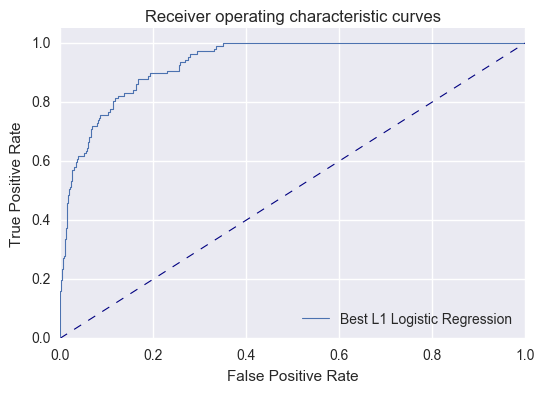

In [43]:
plot_roc_curves(model_data)

In [45]:
roc_auc_score(y_test, probs)

0.93434841961566728

## Retrain the best model with all of the data

In [46]:
best_model.fit(X,y)

Pipeline(steps=[('scalar', StandardScaler(copy=True, with_mean=True, with_std=True)), ('clf', LogisticRegression(C=0.70170382867038261, class_weight='balanced', dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l1', random_state=444,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False))])

### Plot the Coeffecients

In [47]:
coefs =pd.Series(best_model.get_params()['clf'].coef_.tolist()[0])
coefs =pd.Series(best_model.get_params()['clf'].coef_.tolist()[0])
coefs.index = X_test.columns
coefs = coefs[coefs>0]

coefs.sort_values(inplace = True)

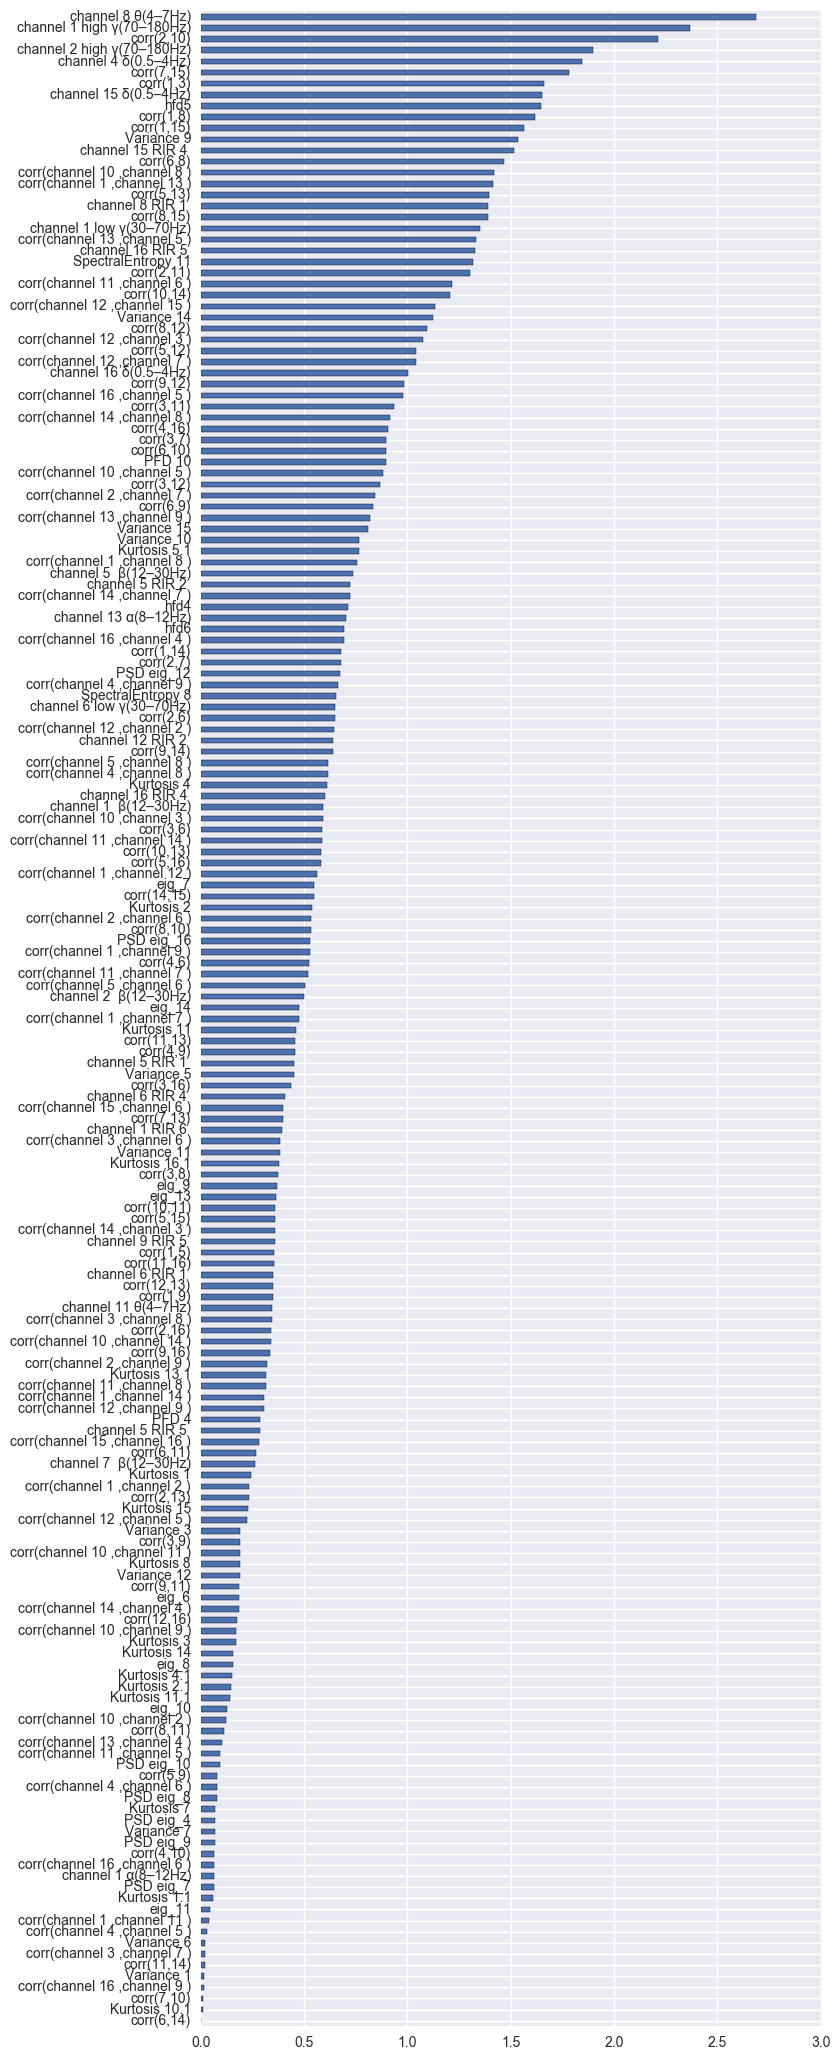

In [48]:
coefs.plot.barh(figsize= (8,26))

In [49]:
len(coefs)

181

### Predict the test data

In [68]:
def load_features(path):
    """loads the features of the data and removes undesired columns """
    
    remove = ['channel 4 RIR 1 ', 'channel 4 RIR 2 ', 'channel 4 RIR 3 ', 'channel 4 RIR 4 ', 'channel 4 RIR 5 ',
              'channel 4 RIR 6 ', 'channel 10 RIR 1 ', 'channel 10 RIR 2 ', 'channel 10 RIR 3 ', 'channel 10 RIR 4 ',
              'channel 10 RIR 5 ', 'channel 10 RIR 6 ', 'SpectralEntropy 4', 'SpectralEntropy 10']
    
    # read in the data 
    data =pd.read_csv(path)
        
    # drop the undesired columns 
    return data.drop(remove, axis = 1)


test_data = load_features(join(base,'testing.csv'))

In [69]:
X_testing = test_data.iloc[:,:-1].copy()
file_names = test_data['filename'].copy()

In [70]:
# There are Nan's so fill them
X_testing =X_testing.fillna(X_testing.mean(),axis = 0)

In [77]:
predictions = [pred[1] for pred in best_model.predict_proba(X_testing)]

In [81]:
submission = pd.DataFrame({'File':file_names, 'Class': predictions})
submission = submission[['File','Class']]

In [82]:
submission.head()

,File,Class
0,new_1_1.mat,0.034494
1,new_1_10.mat,1.000000
2,new_1_100.mat,0.623510
3,new_1_101.mat,0.994052
4,new_1_102.mat,0.973047


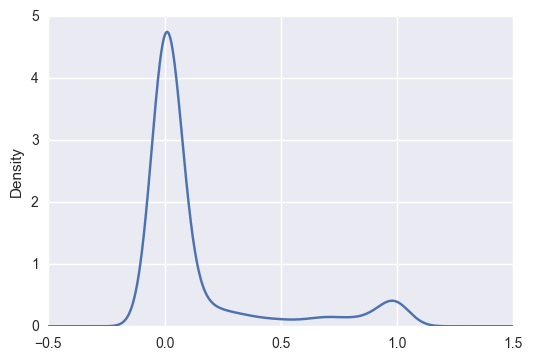

In [83]:
submission.Class.plot.density()

It seems to me that the first ones are more likely to be preictal. 

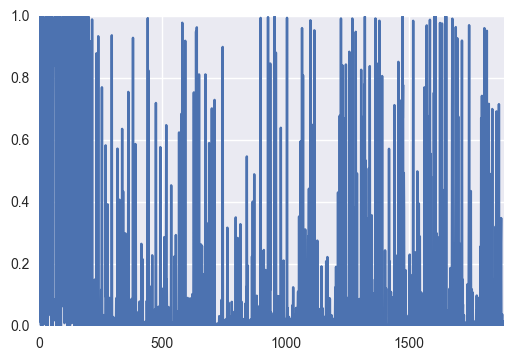

In [86]:
submission.Class.plot()

In [87]:
len(submission)

1888

### Get files not in the data
The problem with this is that i did not have all the files. 

In [97]:
base2 = join('/Users/crivera5/Documents/NonIntuitProjects/Kaggle/KaggleEEG')
paths = [join(base2, 'test_1_new'), 
         join(base2,'test_2_new'),
         join(base2,'test_3_new')]

In [98]:
def get_data_files(list_o_paths):
    """This gets the data matlab files"""
    file_names = []
    for path in list_o_paths:
        files = [join(path, f) for f in listdir(path) if f.endswith('.mat')]
        file_names.extend(files)

    return file_names

In [134]:
unscored_files = [split(f)[1] for f in get_data_files(paths)]
unscored_files = [f for f in unscored_files if f not in list(submission['File'])]
unscored_files =pd.DataFrame({'File':unscored_files})
unscored_files['Class'] = submission.Class.mean()
unscored_files.head()

,File,Class
0,new_1_13.mat,0.138073
1,new_1_147.mat,0.138073
2,new_1_167.mat,0.138073
3,new_1_177.mat,0.138073
4,new_1_18.mat,0.138073


In [146]:
# merge them 
submission = pd.concat([submission, unscored_files])
submission.sort_values('File', inplace = True)

In [147]:
print len(submission)
submission.head()


1908


,File,Class
0,new_1_1.mat,0.034494
1,new_1_10.mat,1.000000
2,new_1_100.mat,0.623510
3,new_1_101.mat,0.994052
4,new_1_102.mat,0.973047


In [149]:
submission.to_csv(join(base,'submission1.csv'), index = False)